In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Check for CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
# Load Caltech 101 dataset
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

dataset = datasets.ImageFolder(root="D:/Deep Learning and genAI/Lab/caltech-101", transform=transform)
num_classes = len(dataset.classes)


In [4]:
# Split dataset into train and test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [5]:
# Define Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [6]:
# Initialize model, loss, and optimizer
input_size = 128 * 128 * 3
hidden_size = 256
output_size = num_classes

model = NeuralNetwork(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Epoch 1/10, Loss: 4.4821
Epoch 2/10, Loss: 4.4661
Epoch 3/10, Loss: 4.4644
Epoch 4/10, Loss: 4.4675
Epoch 5/10, Loss: 4.4675
Epoch 6/10, Loss: 4.4647
Epoch 7/10, Loss: 4.4429
Epoch 8/10, Loss: 4.4334
Epoch 9/10, Loss: 4.4363
Epoch 10/10, Loss: 4.4364


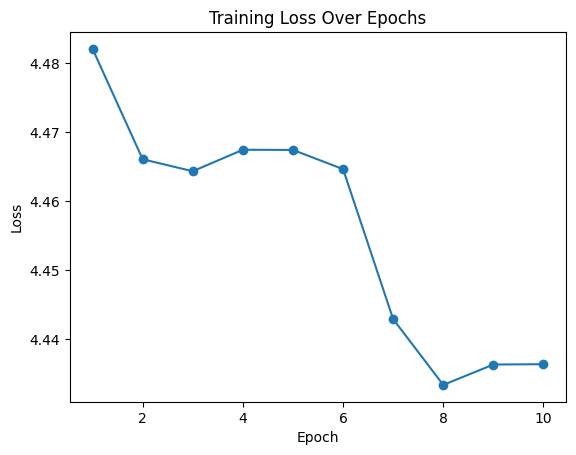

In [8]:
# Training Loop
def train(model, train_loader, epochs=10):
    model.train()
    losses = []
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        losses.append(avg_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

        # Plot Training Loss
    plt.figure()
    plt.plot(range(1, epochs + 1), losses, marker='o', linestyle='-')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Epochs")
    plt.show()

train(model, train_loader, epochs=10)

In [ ]:
# Evaluation
def evaluate(model, test_loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    # Plot Class Distribution
    plt.figure()
    plt.hist(y_pred, bins=num_classes, alpha=0.7, label='Predicted', color='blue')
    plt.hist(y_true, bins=num_classes, alpha=0.7, label='Actual', color='red')
    plt.xlabel("Class Labels")
    plt.ylabel("Frequency")
    plt.title("Class Distribution in Predictions vs Actual Labels")
    plt.legend()
    plt.show()

evaluate(model, test_loader)

Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.44      0.11        89
           1       0.00      0.00      0.00        93
           2       0.58      0.74      0.65        95
           3       0.00      0.00      0.00        39
           4       0.32      0.60      0.42       162
           5       0.00      0.00      0.00         8
           6       0.18      0.87      0.30       157
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        24
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00        19
    

C:\Windows\System32\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\System32\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\System32\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


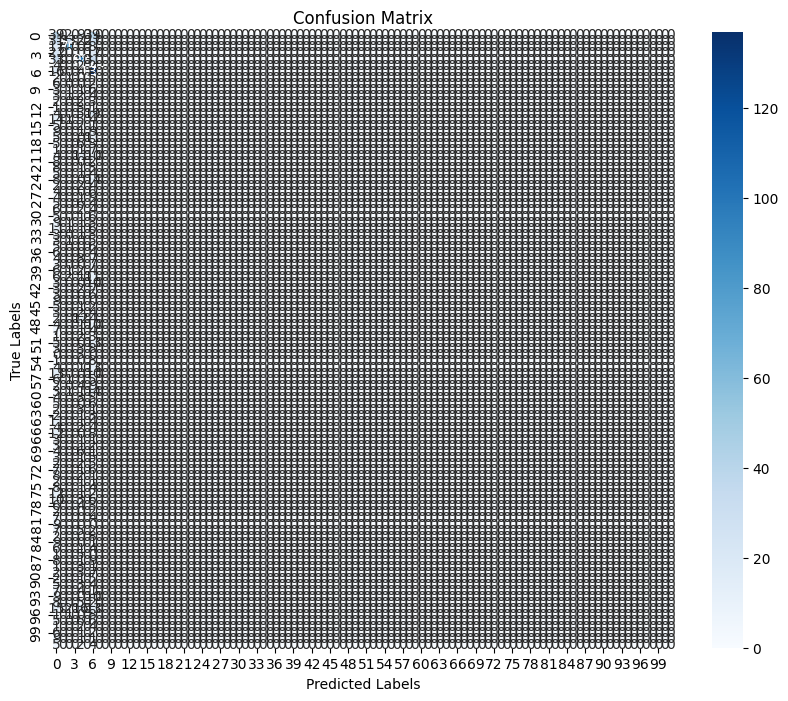

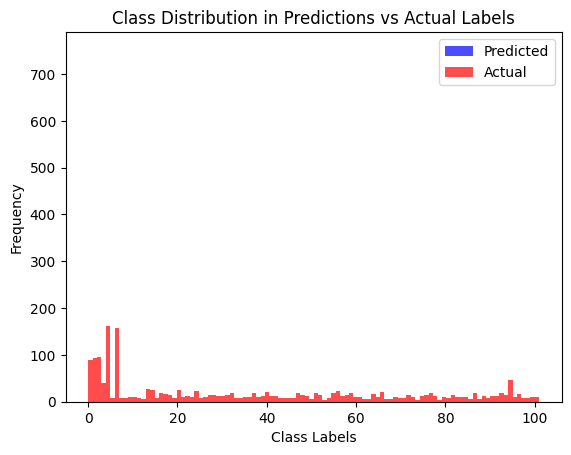